# Анализ сервиса аренды самокатов GoFast

Нам передали некоторые данные о пользователях популярного сервиса аренды самакатов GoFast из нескольких городов, а так же об их поездках. Нужно проанализировать данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- без подписки
   - абонентская плата отсутствует;
   - стоимость одной минуты поездки — 8 рублей;
   - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra
   - абонентская плата — 199 рублей в месяц;
   - стоимость одной минуты поездки — 6 рублей;
   - стоимость старта — бесплатно.

**Описание данных**

*В основных данных есть информация о пользователях, их поездках и подписках.*

**Пользователи** — `users_go.csv`

- `user_id` — уникальный идентификатор пользователя
- `name` — имя пользователя
- `age` — возраст
- `city` — город
- `subscription_type` — тип подписки (free, ultra)

**Поeздки** — `rides_go.csv`

- `user_id` — уникальный идентификатор пользователя
- `distance` — расстояние, которое пользователь проехал в текущей сессии (в метрах)
- `duration` — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- `date` — дата совершения поездки

**Подписки** — `subscriptions_go.csv`

- `subscription_type` — тип подписки
- `minute_price` — стоимость одной минуты поездки по данной подписке
- `start_ride_price` — стоимость начала поездки
- `subscription_fee` — стоимость ежемесячного платежа

**План работы**

**Шаг 1. Загрузка данных**

*1.1 Считааем CSV-файлы с данными с помощью библиотеки pandas и сохраним их в датафреймы. Пути к файлам:*

*1.2 Выведем первые строки каждого набора данных. Изучим общую информацию о каждом датафрейме.*

**Шаг 2. Предобработка данных**

*2.1 Приведем столбец `date` к типу даты pandas.*

*2.2 Создади новый столбец с номером месяца на основе столбца `date`.*

*2.3 Проверим наличие пропущенных значений и дубликатов в датафреймах. Обработаем их, если такие значения присутствуют.*

**Шаг 3. Исследовательский анализ данных**

***Опишим и визуализируем общую информацию о пользователях и поездках:***

- *3.1 частота встречаемости городов;*
- *3.2 соотношение пользователей с подпиской и без подписки;*
- *3.3 возраст пользователей;*
- *3.4 расстояние, которое пользователь преодолел за одну поездку;*
- *3.5 продолжительность поездок.*

**Шаг 4. Объединение данных**

*4.1 Объединим данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуемся методом `merge()`.*

*4.2 Создадим ещё два датафрейма из датафрейма, созданного на этапе 4.1:*

- c данными о пользователях без подписки;
- с данными о пользователях с подпиской.

*4.3 Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.*

**Шаг 5. Подсчёт выручки**

*5.1 Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4.1: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.*

*5.2 В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь.*

**Шаг 6. Проверка гипотез**

*6.1 Проверим некоторые гипотезы о различиях в данных пользователей с подпиской и без нее.*

**Шаг 7. Распределения**

*7.1 Сформулируем ответ на вопрос о количестве промокодов, которые нужно раздать, чтобы вероятность не выполнить влан: **пользователей продливших подписку после бесплатного периода более 100**, была примерно 5%.

*7.2 С помощью аппроксимации оценим вероятность того, что из 1 млн уведомление откроют не более 399,5 тыс. пользователей.*

**Шаг 8. Общие выводы**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import numpy as np
from scipy import stats as st

#### Шаг 1. Загрузка данных

##### Загрузка и изучение данных о пользователях сервиса GoFast

In [2]:
data_users = pd.read_csv('/datasets/users_go.csv')

In [3]:
data_users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [5]:
data_users.describe()

,user_id,age
count,1565.000000,1565.000000
mean,762.633866,24.922045
std,443.260155,4.553496
min,1.000000,12.000000
25%,378.000000,22.000000
50%,762.000000,25.000000
75%,1146.000000,28.000000
max,1534.000000,43.000000


##### Загрузка и изучение данных о поездках пользователей сервиса GoFast

In [6]:
data_riders = pd.read_csv('/datasets/rides_go.csv')
data_riders.head(100)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
...,...,...,...,...
95,9,2717.035685,10.520886,2021-08-04
96,9,2536.038610,13.144154,2021-09-20
97,9,3672.893449,12.475908,2021-10-30
98,9,2729.062718,21.645314,2021-12-18


In [7]:
data_riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [8]:
data_riders.describe()

,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963


##### Загрузка и изучение данных о подписках пользователей сервиса GoFast

In [9]:
data_sub = pd.read_csv('/datasets/subscriptions_go.csv')
data_sub.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [10]:
data_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


**Загрузив и рассмотрев данные можем сказать следующее:**

- для каждого датафрейма ненулевых значений одинаковое количество по столбцам;
- данные загрузились корректно;
- названия столбцов написаны согласно "змеиному" регистру.

#### Шаг 2. Предобработка данных

##### Проверка предоставленных датафреймов на наличие пропусков

*Датафрейм пользователи*

In [11]:
data_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

*Датафрейм поездок*

In [12]:
data_riders.isna().sum()

user_id     0
distance    0
duration    0
date        0
dtype: int64

*Датафрейм подписок*

In [13]:
data_sub.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Пропусков в датафреймах не обнаружено

##### Приведем столбец `date` к типу даты pandas.

In [14]:
data_riders['date'] = pd.to_datetime(data_riders['date'], format = '%Y-%m-%d')
data_riders.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


##### Создадим новый столбец с номером месяца на основе столбца `date`

Сначала проверим, за какой период предоставлены данные. Если данные предоставлены за несколько лет, то они могут попасть в один и тот же месяц

In [15]:
data_riders['date'].dt.year.unique()

array([2021])

Данные предоставлены только за один год, соответственно ошибок не будет, добавим номер месяца

In [16]:
data_riders['month'] = pd.DatetimeIndex(data_riders['date']).month
data_riders.head(10)

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
5,1,2770.890808,16.650138,2021-10-09,10
6,1,3039.020292,14.927879,2021-10-19,10
7,1,2842.118050,23.117468,2021-11-06,11
8,1,3412.690668,15.238072,2021-11-14,11
9,1,748.690645,15.041884,2021-11-22,11


In [17]:
data_riders.describe()

,user_id,distance,duration,month
count,18068.000000,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011,6.486772
std,434.734317,1116.831209,6.091051,3.437410
min,1.000000,0.855683,0.500000,1.000000
25%,487.000000,2543.226360,13.597563,4.000000
50%,889.000000,3133.609994,17.678395,6.000000
75%,1213.250000,3776.222735,21.724800,9.000000
max,1534.000000,7211.007745,40.823963,12.000000


Отлично, минимальное значение месяца 1, а максимамльное 12, ничего не сломалось

##### Обработка дубликатов

**Датафрейм с пользователями**

In [18]:
data_users.duplicated().sum()

31

Имеются явные дубликаты в датафреме `data_users`, считаю нужным их удалить, это может быть багом системы или на разных устройствах зашли под одним и тем же аккаунтом

In [19]:
data_users.drop_duplicates(inplace=True)

In [20]:
data_users.duplicated().sum()

0

In [21]:
data_users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


Явные дубликаты в данном датафрейме обработаны, ничего не сломалось, идем дальше

In [22]:
data_users['name'].unique()

array(['Кира', 'Станислав', 'Алексей', 'Константин', 'Адель', 'Регина',
       'Игорь', 'Юрий', 'Ян', 'Валерий', 'Агата', 'Марк', 'Ева',
       'Антонина', 'Валерия', 'Амалия', 'Даниил', 'Аделина', 'Святогор',
       'Борис', 'Вероника', 'Ростислав', 'Назар', 'Эдуард', 'Василий',
       'Денис', 'Тамара', 'Николай', 'Эвелина', 'Федор', 'Руслан', 'Иван',
       'Любовь', 'Ярослава', 'Майя', 'Ильдар', 'Данила', 'Нина',
       'Стефания', 'Ясмина', 'Дмитрий', 'Александр', 'Одиссей', 'Арсений',
       'Алла', 'Таисия', 'Максим', 'Юлиана', 'Павел', 'Карина', 'Алиса',
       'Лидия', 'Рамиль', 'Родион', 'Ника', 'Оксана', 'Анастасия',
       'Маргарита', 'Вера', 'Тимур', 'Никита', 'Лев', 'Влад', 'Артур',
       'Анна', 'Ольга', 'Вячеслав', 'Ксения', 'Виталина', 'Владислав',
       'Тамерлан', 'Амина', 'Вадим', 'Олеся', 'Зарина', 'Егор', 'Гордей',
       'Лилия', 'Святослав', 'Роберт', 'Амир', 'Влада', 'Богдан',
       'Полина', 'Марат', 'Елисей', 'Макар', 'Алина', 'Глеб', 'Андрей',
       'Ал

Ошибок в именах нет, неявных дубликатов в столбце `name` не обнаружено

In [23]:
data_users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

Неявных дубликатов в столбце `city` не обнаружено

**Датафрейм с поездками**

In [24]:
data_riders.duplicated().sum()

0

В данном датафрейме дубликатов нет, обрабаотывать датафрейм с подписками не имеет смысла там всего две строки мы изначально убедились что там все хорошо

**При обработке данных выяснилось следующее:**
- Пропущенных значений в датафреймах нет
- Был добавлен столбец `month` в датафрейм `data_riders` с номером месяца
- Дубликаты были обнаружены только в датафрейме с пользователями, они были удалены

#### Шаг 3. Исследовательский анализ данных

**Описание и визуализация общей информации о пользователях и поездках**

##### Частота встречаемости городов

In [25]:
data_users['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

In [26]:
round(data_users['city'].value_counts() / data_users['city'].value_counts().sum() * 100, 0)

Пятигорск         14.0
Екатеринбург      13.0
Ростов-на-Дону    13.0
Краснодар         13.0
Сочи              12.0
Омск              12.0
Тюмень            12.0
Москва            11.0
Name: city, dtype: float64

*Для визуализации данных используем столбчатую диаграмму*

<AxesSubplot:title={'center':'Распределение пользователей по городам'}>

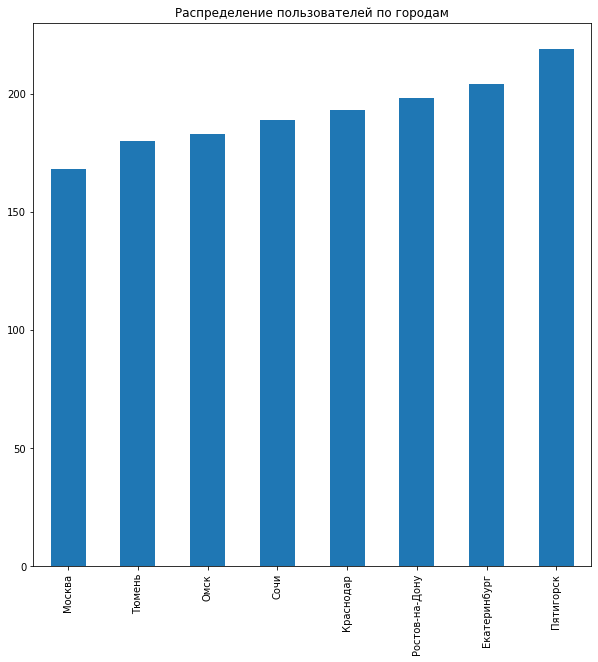

In [27]:
data_users['city'].value_counts(ascending=True).plot(
    title = 'Распределение пользователей по городам',
    kind = 'bar', 
    figsize = (10,10)
    )

<AxesSubplot:title={'center':'Распределение пользователей по городам в %'}>

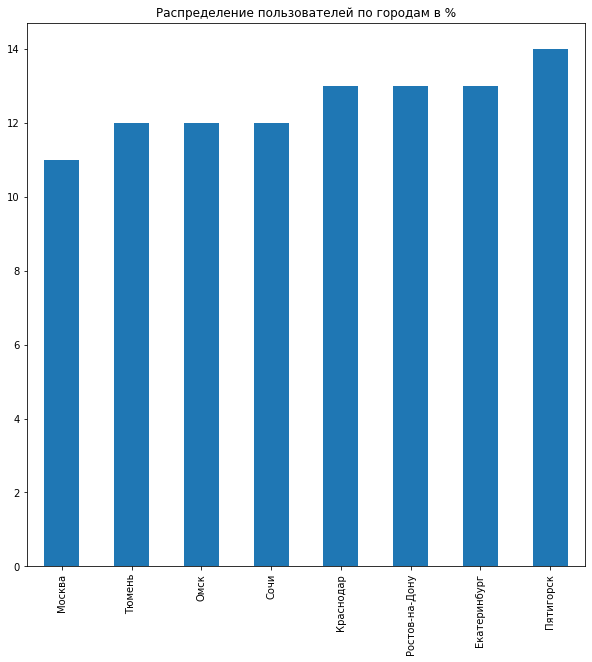

In [28]:
round(data_users['city'].value_counts(ascending=True) / data_users['city'].value_counts(ascending=True).sum() * 100, 0).plot(title = 'Распределение пользователей по городам в %',
                                                                                                 kind = 'bar',
                                                                                                 figsize = (10,10)
                                                                                                )

*Распределение пользователй по городам примерно одинаковое, однако наибольшее количество в Пятигорске - 14%, а наименьшее в Москве - 11%*

##### Cоотношение пользователей с подпиской и без подписки

In [29]:
data_users['subscription_type'].value_counts()

free     835
ultra    699
Name: subscription_type, dtype: int64

*Используем круговую диаграмму для отображения соотношения количества числа пользователей с подпиской и без*

<AxesSubplot:title={'center':'Соотношение пользователей сервиса GoFast с подпиской и без нее'}, ylabel='subscription_type'>

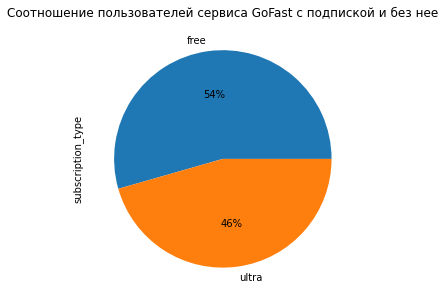

In [30]:
data_users['subscription_type'].value_counts().plot(
    title = 'Соотношение пользователей сервиса GoFast с подпиской и без нее',
    kind = 'pie',
    y = data_users['subscription_type'].value_counts(),
    autopct = '%1.0f%%',
    figsize = (5,5)
)

*Преобладают пользователи без подписки их 54%*

##### Оценим возраст пользователей сервиса GoFast

*Построим гистограмму распределения возрастов клиентов сервиса GoFast*

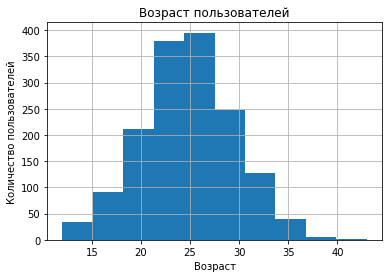

In [31]:
plt.hist(data_users['age'], bins=10)
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid()

*Преобладающее количество клиентов сервиса - люди в возрасте от 20-ти до 30-ти лет*

In [32]:
data_users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

*Минимальный возраст клиентов 12 лет, максимальный - 43 года, средий - порядка 25 лет*

##### Расстояние, которое пользователь преодолел за одну поездку

Рассмотрим самые длинные поездки пользователей сервиса

In [33]:
data_riders['distance'].sort_values(ascending=False).head(10)

16309    7211.007745
16484    7066.003772
15580    6908.491343
17171    6760.940067
17242    6724.932981
10341    6671.969833
11385    6601.197575
12086    6538.937375
10915    6535.386520
11319    6503.600402
Name: distance, dtype: float64

*Видим что самые длинные поездки более 7 км*

Рассмотрим самые короткие поездки пользователей сервиса

In [34]:
data_riders['distance'].sort_values().head(10)

11555     0.855683
9541      2.570787
13690     4.329506
8658      6.784447
7841      7.097072
8906     11.283615
8324     12.233115
13940    15.000606
15626    15.366168
11862    15.630873
Name: distance, dtype: float64

*А самые короткие не превышают и нескольких метров*

*Построим гистограмму распределения дальности поездок пользователей сервиса*

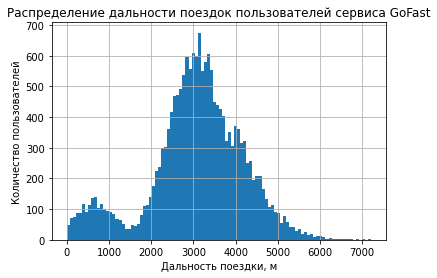

In [35]:
plt.hist(data_riders['distance'], bins=100)
plt.title('Распределение дальности поездок пользователей сервиса GoFast')
plt.xlabel('Дальность поездки, м')
plt.ylabel('Количество пользователей')
plt.grid()

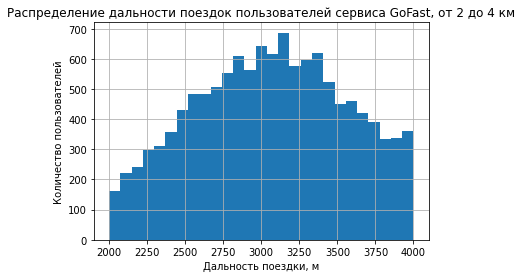

In [36]:
plt.hist(data_riders['distance'], bins=27, range=(2000,4000))
plt.title('Распределение дальности поездок пользователей сервиса GoFast, от 2 до 4 км')
plt.xlabel('Дальность поездки, м')
plt.ylabel('Количество пользователей')
plt.grid()

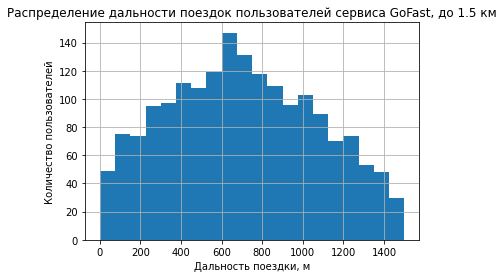

In [37]:
plt.hist(data_riders['distance'], bins=20, range=(0,1500))
plt.title('Распределение дальности поездок пользователей сервиса GoFast, до 1.5 км')
plt.xlabel('Дальность поездки, м')
plt.ylabel('Количество пользователей')
plt.grid()

*Видим что преобладает дальность поездко от 2 до 4 км, а так же есть пик между 0 и примерно 1,5 километрами. Можем предположить что первый пик соотсветсвует людям которые используют самокат чтобы добраться до работы, а основной пик, это люди коткорые взяли самокат чтобы развлечься, например покататься по парку*

##### Продолжительность поездок

Рассмотрим самые не продолжительные поездки пользователей сервиса

In [38]:
data_riders['duration'].sort_values().head(100)

12013    0.500000
17314    0.500000
15029    0.500000
7437     0.500000
12967    0.500000
           ...   
8906     2.035632
6691     2.053251
13308    2.180879
17309    2.222598
14081    2.224797
Name: duration, Length: 100, dtype: float64

*Минимальная продолжительность поездки составляет 0.5 минуты*

Рассмотрим самые продолжительные поездки пользователей сервиса

In [39]:
data_riders['duration'].sort_values(ascending=False).head(10)

4215    40.823963
4709    39.873856
2623    39.526602
1998    38.352763
6453    38.265229
143     38.125729
3729    37.014141
499     36.906491
6348    36.809310
4653    36.622595
Name: duration, dtype: float64

*Самые продолжительные поездки пользователей сервиса длятся более 36 минут*

*Построим гистограмму распределения продолжительности поездок пользователей сервиса*

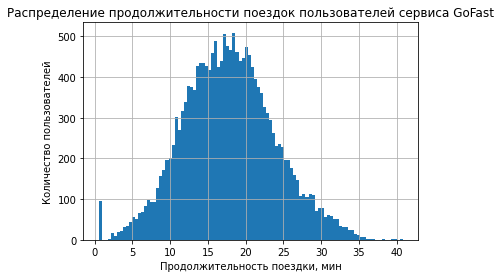

In [40]:
plt.hist(data_riders['duration'], bins=100)
plt.title('Распределение продолжительности поездок пользователей сервиса GoFast')
plt.xlabel('Продолжительность поездки, мин')
plt.ylabel('Количество пользователей')
plt.grid()

*Основная масса пользователей имеет продолжительность поездки примерно 12-22 минуты. Имеется странный пик в районе 0*

**Выводы**

**Частота встречаемости городов**

Количество пользователей по городам распределено примерно одинаково. Лидером по количеству пользователей является Пятигорск - 219 пользователей. Меньше всего пользователей в Москве - 168. Можем предположить, что это связано с размером города, в Пятигорске удобнее брать самокат, чтобы куда-то добраться.

**Соотношение пользователей с подпиской и без подписки**

Пользователей, использующих бесплатную подписку больше - 835 человек, что является примерно 54% от общего числа пользователей. С платной подпиской 699 пользователей, что соответственно является примерно 46%.

**Возраст пользователей**

- минимальный возраст пользователей 12 лет;
- максимальный возраст пользователей - 43 года;
- преобладающее большинство пользователей сервиса укладываются в промежуток от 20-ти до 30-ти лет.

**Расстояние, которое пользователь преодолел за одну поездку**

- самая короткая дистанция - 0.86 км;
- самая длинная - 7.2 км;
- в основном пользователи проезжают от 2 км до 4 км;
- так же имеется небольшой пик в районе 0 - ~1.5 км.

**Продолжительность поездок**

- самые короткие поездки - по пол минуты, что странно, возможно пользователи просто передумали пользоваться самокатом, или была техническая неинсправность самого самоката.
- самая длинная поездка заняла 40 минут.
- в основном же длительность поездки состовляет от ~12 до ~22 минут.

#### Шаг 4. Объединение данных

##### Объединим данные о пользователях, поездках и подписках в один датафрейм

In [41]:
data_full = data_users.merge(data_riders)
data_full = data_full.merge(data_sub)
data_full.head(100)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
95,9,Ян,21,Пятигорск,ultra,2717.035685,10.520886,2021-08-04,8,6,0,199
96,9,Ян,21,Пятигорск,ultra,2536.038610,13.144154,2021-09-20,9,6,0,199
97,9,Ян,21,Пятигорск,ultra,3672.893449,12.475908,2021-10-30,10,6,0,199
98,9,Ян,21,Пятигорск,ultra,2729.062718,21.645314,2021-12-18,12,6,0,199


In [42]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


Все объеденилось корректно, продолжаем

##### Создадим ещё два датафрейма из датафрейма `data_full`

Датафрейм c данными о пользователях без подписки

In [43]:
data_sub_free = data_full.query('subscription_type == "free"')
data_sub_free.head(100)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6595,706,Юрий,23,Краснодар,free,2285.965977,19.079924,2021-06-16,6,8,50,0
6596,706,Юрий,23,Краснодар,free,4942.953065,30.476510,2021-07-07,7,8,50,0
6597,706,Юрий,23,Краснодар,free,2440.146524,12.365600,2021-07-10,7,8,50,0
6598,706,Юрий,23,Краснодар,free,3369.361706,10.738723,2021-08-26,8,8,50,0


Датафрейм c данными о пользователях c подпиской

In [44]:
data_sub_ultra = data_full.query('subscription_type == "ultra"')
data_sub_ultra.head(100)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
95,9,Ян,21,Пятигорск,ultra,2717.035685,10.520886,2021-08-04,8,6,0,199
96,9,Ян,21,Пятигорск,ultra,2536.038610,13.144154,2021-09-20,9,6,0,199
97,9,Ян,21,Пятигорск,ultra,3672.893449,12.475908,2021-10-30,10,6,0,199
98,9,Ян,21,Пятигорск,ultra,2729.062718,21.645314,2021-12-18,12,6,0,199


##### Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

Визуализируем данные о расстоянии поездки для датафрейма c данными о пользователях без подписки

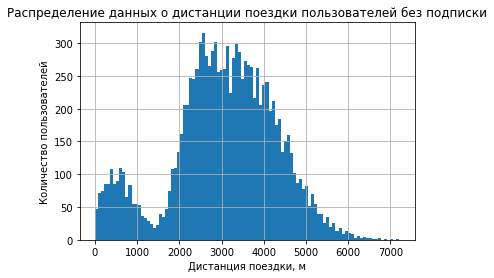

In [45]:
plt.hist(data_sub_free['distance'], bins=100)
plt.title('Распределение данных о дистанции поездки пользователей без подписки')
plt.xlabel('Дистанция поездки, м')
plt.ylabel('Количество пользователей')
plt.grid()

*Преобладающее число пользователей без подписки проезжают от 3 до 4 км, так же есть небольшой пик от 0 до 1 км*

Визуализируем данные о времени поездки для датафрейма c данными о пользователях без подписки

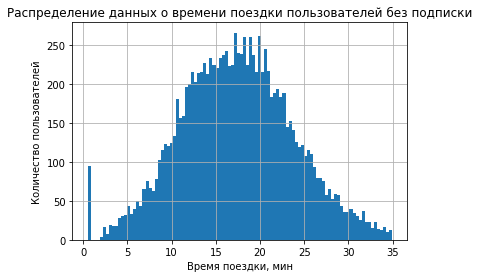

In [46]:
plt.hist(data_sub_free['duration'], bins=100)
plt.title('Распределение данных о времени поездки пользователей без подписки')
plt.xlabel('Время поездки, мин')
plt.ylabel('Количество пользователей')
plt.grid()

*Преобладающее число пользователей без подписки имеют время поездки от 11 до 21 минуты, так же есть странный пик около 0 минут*

Визуализируем данные о расстоянии поездки для датафрейма c данными о пользователях с подпиской

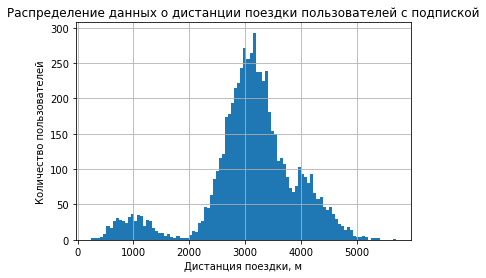

In [47]:
plt.hist(data_sub_ultra['distance'], bins=100)
plt.title('Распределение данных о дистанции поездки пользователей с подпиской')
plt.xlabel('Дистанция поездки, м')
plt.ylabel('Количество пользователей')
plt.grid()

*Преобладающее число пользователей с подпиской проезжают от 2.5 до 3.5 км, так же есть небольшой пик в районе 1 км*

Визуализируем данные о времени поездки для датафрейма c данными о пользователях с подпиской

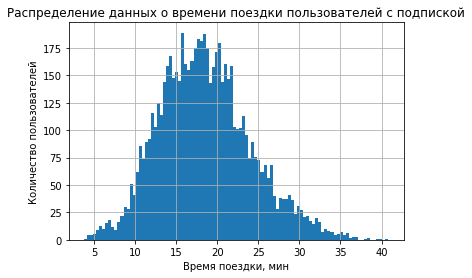

In [48]:
plt.hist(data_sub_ultra['duration'], bins=100)
plt.title('Распределение данных о времени поездки пользователей с подпиской')
plt.xlabel('Время поездки, мин')
plt.ylabel('Количество пользователей')
plt.grid()

*Преобладающее число пользователей с подпиской имеют время поездки от 12 до 22 минут*

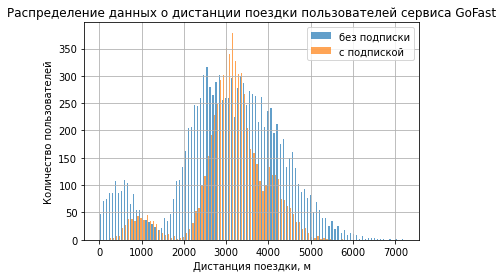

In [49]:
plt.hist([data_sub_free['distance'], data_sub_ultra['distance']], bins=100, alpha=0.7, label=['без подписки', 'c подпиской'])
plt.title('Распределение данных о дистанции поездки пользователей сервиса GoFast')
plt.xlabel('Дистанция поездки, м')
plt.ylabel('Количество пользователей')
plt.legend()
plt.grid()

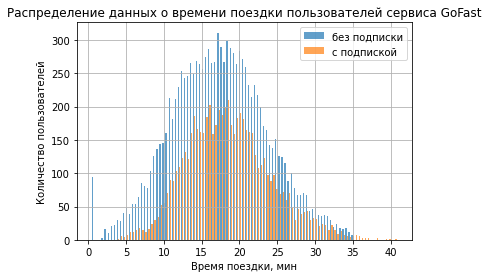

In [50]:
plt.hist([data_sub_free['duration'], data_sub_ultra['duration']], bins=100, alpha=0.7, label=['без подписки', 'c подпиской'])
plt.title('Распределение данных о времени поездки пользователей сервиса GoFast')
plt.xlabel('Время поездки, мин')
plt.ylabel('Количество пользователей')
plt.legend()
plt.grid()

**Выводы**

Объединили данные о пользователях, поездках и подписках в один датафрейм `data_full`

Создали ещё два датафрейма из датафрейма `data_full`:

- о пользователях без подписки `data_sub_free`;
- о пользователях с подпиской `data_sub_ultra`.

Визуализировали данные о длительности и времени поездок пользователей с подпиской и без:

- преобладающее число пользователей без подписки проезжают от 3 до 4 км, так же есть небольшой пик от 0 до 1 км;
- преобладающее число пользователей без подписки имеют время поездки от 11 до 21 минуты, так же есть странный пик около 0 минут;
- преобладающее число пользователей с подпиской проезжают от 2.5 до 3.5 км, так же есть небольшой пик в районе 1 км;
- преобладающее число пользователей с подпиской имеют время поездки от 12 до 22 минут.

*Так же есть странный пик около 0 минут у пользователей без подписки, у пользователей с подпиской его нет, пока что нет никаких предположений о том, что это*

Гаффик *Распределение данных о дистанции поездки пользователей сервиса GoFast*, показывает что длинные и короткие поездки чаще совершают пользователеи без подписки, а пользоатели с подпиской, чаще всего проезжают от 2.5 до 3.5 км.

Граффик *Распределение данных о времени поездки пользователей сервиса GoFast*, что на всех временных промежутках пользователи без подписки больше, а длительные поездки, от 35 минут, совершают только пользователи с подпиской.

#### Шаг 5. Подсчёт выручки

##### Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4.1: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [51]:
# округлим значение в столбце `duration` с помощью "потолка"
data_full['duration'] = np.ceil(data_full['duration'])
# создадим сводную таблицу с помощью метода `pivot_table`, в качестве аргумента для `aggfunc` будет словарь, чтобы можно было выполнить разные действия с разными столбцами
data_grouped = data_full.pivot_table(index = ['month', 'user_id'],
                                   values = ['distance', 'duration', 'name', 'subscription_type'],
                                   aggfunc = {'distance': sum,
                                              'duration': sum,
                                              # к столбцу `name` применим функцию `len`, чтобы посчитать количество поездок
                                              'name': len,
                                              # к столбцу `subscription_type` применим функцию `min`, чтобы оставить единственное значение
                                              'subscription_type': min
                                             }
)
data_grouped.head(10)

distance  duration  name subscription_type
month user_id                                               
1     1        7027.511294      42.0     2             ultra
      3        3061.777147      13.0     1             ultra
      5        3914.646990      13.0     1             ultra
      7        6478.080979      28.0     2             ultra
      12       3577.151148      33.0     1             ultra
      13       6687.987446      42.0     2             ultra
      14       7699.643820      35.0     2             ultra
      15       4187.621459      39.0     1             ultra
      20       3516.719208      29.0     1             ultra
      22       3058.692225      13.0     1             ultra

In [52]:
# заменим название столбца `name` на `number_trips`, так как в этом столбце мы считали количество имен, как количество поездок
data_grouped.rename(columns={'name' : 'number_trips'}, inplace=True)
data_grouped.head(10)

distance  duration  number_trips subscription_type
month user_id                                                       
1     1        7027.511294      42.0             2             ultra
      3        3061.777147      13.0             1             ultra
      5        3914.646990      13.0             1             ultra
      7        6478.080979      28.0             2             ultra
      12       3577.151148      33.0             1             ultra
      13       6687.987446      42.0             2             ultra
      14       7699.643820      35.0             2             ultra
      15       4187.621459      39.0             1             ultra
      20       3516.719208      29.0             1             ultra
      22       3058.692225      13.0             1             ultra

##### В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь

In [53]:
data_sub.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [54]:
# создадим функию `revenue_calculation`, которая будет считать выручку для каждого пользователя в месяц, в зависимотсти от того, есть ли у него подписка ил нет
def revenue_calculation(row):
    if row['subscription_type'] == 'free':
        return data_sub.loc[0,'minute_price'] * row['duration'] + data_sub.loc[0,'start_ride_price'] * row['number_trips']
    elif row['subscription_type'] == 'ultra':
        return data_sub.loc[1,'minute_price'] * row['duration'] + data_sub.loc[1,'subscription_fee']
    else:
        return 'Ошибка в виде подписки'

In [55]:
data_grouped['revenue_month'] = data_grouped.apply(revenue_calculation, axis=1)
data_grouped.head(10)

distance  duration  number_trips subscription_type  \
month user_id                                                          
1     1        7027.511294      42.0             2             ultra   
      3        3061.777147      13.0             1             ultra   
      5        3914.646990      13.0             1             ultra   
      7        6478.080979      28.0             2             ultra   
      12       3577.151148      33.0             1             ultra   
      13       6687.987446      42.0             2             ultra   
      14       7699.643820      35.0             2             ultra   
      15       4187.621459      39.0             1             ultra   
      20       3516.719208      29.0             1             ultra   
      22       3058.692225      13.0             1             ultra   

               revenue_month  
month user_id                 
1     1                451.0  
      3                277.0  
      5                277.0  
      7                367.0  
      12               397.0  
      13               451.0  
      14               409.0  
      15               433.0  
      20               373.0  
      22               277.0

**Выводы**

Создали сводную таблицу `data_grouped` с данными о суммарном расстоянии, количестве поездок и суммарном времени для каждого пользователя за каждый месяц

Округлили значение из столбца `duration` до "потолка" с помощью `np.ceil`

В этот же датафрейм добавили столбец с помесячной выручкой, которую принёс каждый пользователь

#### Шаг 6. Проверка гипотез

##### Важно понять, тратят ли пользователи с подпиской больше времени на поездки?

Проверим, тратят ли пользователи с подпиской больше времени на поездки, если да, то пользователи с подпиской могут быть «выгоднее» для компании.

Проверим гипотезу: **пользователи с подпиской тратят больше времени на поездки, чем пользователи на без подписки**

H_0: Время поездки пользователей с подпиской ultra = времени поездки пользователей без подписки free

H_1: Время поездки  пользователей с подпиской ultra > времени поездки пользователей без подписки free

Уровень статистической значимости примем alpha = 0.05

In [56]:
print('Среднее значение для выборки пользователей с подпиской:', data_sub_ultra['duration'].mean())
print('Среднее значение для выборки пользователей без подписки:', data_sub_free['duration'].mean())

alpha = 0.05

results = st.ttest_ind(data_sub_ultra['duration'], data_sub_free['duration'], alternative='greater')

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Среднее значение для выборки пользователей с подпиской: 18.54198516280583
Среднее значение для выборки пользователей без подписки: 17.39090929866399
1.2804098316645618e-34
Отвергаем нулевую гипотезу


Гипотезу проверили, отвергли гипотезу о равенстве времени поездок пользователей с и без подписки, следовательно время поездки пользователей с подпиской `ultra` выше, чем пользователей без подписки `free`

##### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 

Проверим гипотезу: **пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку**

H_0: Расстояние поездки пользователей с подпиской ultra = 3130 метров

H_1: Расстояние поездки пользователей с подпиской ultra > 3130 метров

Уровень статистической значимости примем alpha = 0.05

In [57]:
print('Среднее значение для выборки пользователей с подпиской:', data_sub_ultra['distance'].mean())

interested_value = 3130

alpha = 0.05

results = st.ttest_1samp(data_sub_ultra['distance'], interested_value, alternative='greater')

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Среднее значение для выборки пользователей с подпиской: 3115.4453880370247
0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


Гипотезу проверили, отвергнуть нулевую гипотезу не получилось, следовательно мы не можем утверждать что пользователи с подпиской `ultra` проезжают более 3130 м

##### Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

Проверим гипотезу: **помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки**

H_0: Выручка пользователей с подпиской ultra = выручке пользователей без подписки free

H_1: Выручка пользователей с подпиской ultra > выручки пользователей без подписки free

Уровень статистической значимости примем alpha = 0.05

In [58]:
print('Среднее значение для выборки пользователей с подпиской:', data_grouped.loc[data_grouped.subscription_type == 'ultra', 'revenue_month'].mean())
print('Среднее значение для выборки пользователей без подписки:', data_grouped.loc[data_grouped.subscription_type == 'free', 'revenue_month'].mean())

alpha = 0.05

results = st.ttest_ind(data_grouped.loc[data_grouped.subscription_type == 'ultra', 'revenue_month'],
                       data_grouped.loc[data_grouped.subscription_type == 'free', 'revenue_month'],
                       alternative = 'greater'                      
                      )

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Среднее значение для выборки пользователей с подпиской: 362.7921906022502
Среднее значение для выборки пользователей без подписки: 328.6413651073845
1.8850394384715216e-31
Отвергаем нулевую гипотезу


Гипотезу проверили, нулевую гипотезу отвергли, следовательно пользователи с подпиской `ultra` приносят больше выручки чем пользователи без подписки `free`

##### Выбор теста для проверки гипотезы

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

**Так как это зависимые выборки, будем использовать гипотезу о равенстве средних для зависимых выборок**

Сформулируем гипотезы:

- Н_0: mu1 = mu2
- H_1: mu1 > mu2

где mu1 и mu2 это средние значения количество обращений в техподдержку до и после изменения.

Метод, который нужно использовать при сравнении `scipy.stats.ttest_rel()`.

Будем проверять одностороннюю гипотезу, так как в задании написано, что количество обращений в техподдержку должно значимо снизиться.

**Выводы**

Проверили гипотезу: **пользователи с подпиской тратят больше времени на поездки, чем пользователи на без подписки**. Отвергли гипотезу о равенстве времени поездок пользователей с и без подписки, следовательно время поездки пользователей с подпиской `ultra` выше, чем пользователей без подписки `free`.

Проверим гипотезу: **пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку**. Отвергнуть гипотезу о равенстве дистанции поездки пользователей с подпиской 3130 м не получилось, следовательно мы не можем утверждать что пользователи с подпиской `ultra` проезжают менее 3130 м.

Проверим гипотезу: **помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки**. Отвергли гипотезу о равенстве выручек пользователей с и без подписки, следовательно пользователи с подпиской `ultra` приносят больше выручки чем пользователи без подписки `free`.

#### Шаг 7. Распределения

##### Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. 

Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию и сформулируйте ответ на вопрос о количестве промокодов.

In [4]:
from scipy.stats import poisson, binom, norm
from math import sqrt

n = 1180
p = 0.1

lamda = n * p

interested_value = 100

result = poisson.cdf(interested_value ,lamda)
print(result)

0.050737812243497736


Эта задача решается с помощью распредлеения Пуассона, в котором лямда задается значениями `n` - количество промокодов и `p` - вероятность того что клиент продлит подписку, `interested_value` - минимальное значение требуемых клиентов продливших подписку.

Подбором значение, удалось обнаружить, что если раздать не менее 1180 промокодов, то вероятность получить менее 100 пользователей продливших подписку, выше 5% что и требовалось доказать.

##### Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении.

Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

In [60]:
n = 1000000
p = 0.4

interested_value = 399500

mu = n * p
sigma = sqrt(n * p * (1 - p))

distr = st.norm(mu, sigma) 

result = distr.cdf(interested_value)
print(result)

0.15371708296369768


Вероятность что из 1 млн отправленых писем, будут открыты не более 399.5 тысяч, составлет 15.3717%

#### Шаг 8. Общий вывод

Загрузили 3 датафрейма: с пользователями, информацией о поездках, информацией о подписках.

Дальше проверили данные на пропуски, их не оказалось ни в одной таблице. Поменяли тип данных у столбца `date` из датафрейма `data_riders` к типу даты. Также добавили столбец `month` с номером месяца. И удалили дубликаты строк из датафрейма с пользователями.

Провели исследовательский анализ данных:

**Частота встречаемости городов**

Количество пользователей по городам распределено примерно одинаково. Лидером по количеству пользователей является Пятигорск - 219 пользователей. Меньше всего пользователей в Москве - 168. Можем предположить, что это связано с размером города, в Пятигорске удобнее брать самокат, чтобы куда-то добраться.

**Соотношение пользователей с подпиской и без подписки**

Пользователей, использующих бесплатную подписку больше - 835 человек, что является примерно 54% от общего числа пользователей. С платной подпиской 699 пользователей, что соответственно является примерно 46%.

**Возраст пользователей**

- минимальный возраст пользователей 12 лет;
- максимальный возраст пользователей - 43 года;
- преобладающее большинство пользователей сервиса укладываются в промежуток от 20-ти до 30-ти лет.

**Расстояние, которое пользователь преодолел за одну поездку**

- самая короткая дистанция - 0.86 км;
- самая длинная - 7.2 км;
- в основном пользователи проезжают от 2 км до 4 км;
- так же имеется небольшой пик в районе 0 - ~1.5 км.

**Продолжительность поездок**

- самые короткие поездки - по пол минуты, что странно, возможно пользователи просто передумали пользоваться самокатом, или была техническая неинсправность самого самоката.
- самая длинная поездка заняла 40 минут.
- в основном же длительность поездки состовляет от ~12 до ~22 минут.

Объединили данные о пользователях, поездках и подписках в один датафрейм `data_full`

Создали ещё два датафрейма из датафрейма `data_full`:

- о пользователях без подписки `data_sub_free`;
- о пользователях с подпиской `data_sub_ultra`.

Визуализировали данные о длительности и времени поездок пользователей с подпиской и без:

- преобладающее число пользователей без подписки проезжают от 3 до 4 км, так же есть небольшой пик от 0 до 1 км;
- преобладающее число пользователей без подписки имеют время поездки от 11 до 21 минуты, так же есть странный пик около 0 минут;
- преобладающее число пользователей с подпиской проезжают от 2.5 до 3.5 км, так же есть небольшой пик в районе 1 км;
- преобладающее число пользователей с подпиской имеют время поездки от 12 до 22 минут.

**Из вышесказанного следует, что пользователи без подписки совершают более длинные и длительные поездки, чем пользователеи с подпиской**

*Так же есть странный пик около 0 минут у пользователей без подписки, у пользователей с подпиской его нет, пока что нет никаких предположений о том, что это*

Создали сводную таблицу `data_grouped` с данными о суммарном расстоянии, количестве поездок и суммарном времени для каждого пользователя за каждый месяц

Округлили значение из столбца `duration` до "потолка" с помощью `np.ceil`

В этот же датафрейм добавили столбец с помесячной выручкой, которую принёс каждый пользователь.

Проверили гипотезу: **пользователи с подпиской тратят больше времени на поездки, чем пользователи на без подписки**. Отвергли гипотезу о равенстве времени поездок пользователей с и без подписки, следовательно время поездки пользователей с подпиской `ultra` выше, чем пользователей без подписки `free`.

Проверим гипотезу: **пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку**. Отвергнуть гипотезу о равенстве дистанции поездки пользователей с подпиской 3130 м не получилось, следовательно мы не можем утверждать что пользователи с подпиской `ultra` проезжают более 3130 м.

Проверим гипотезу: **помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки**. Отвергли гипотезу о равенстве выручек пользователей с и без подписки, следовательно пользователи с подпиской `ultra` приносят больше выручки чем пользователи без подписки `free`.

Подбором значение, удалось обнаружить, что если раздать не менее 1180 промокодов, то вероятность получить менее 100 пользователей продливших подписку, выше 5% что и требовалось доказать.

Вероятность что из 1 млн отправленых писем, будут открыты не более 399.5 тысяч, составлет 15.3717%

**Пользователи с попиской `ultra`, выгоднее для коммпании, так как они дольше используют самокаты, проезжают в основном около 3130 метров, что помогает меньше изнашивать самокат, а так же они приносят больше выручки чем полььзователи без подписки.**